# Artificial Intelligence Topic 2 Machine Learning

## Week 5: Introduction, Ethics and types

## Attendance Code VJ-SF-AS


## This Week:
###  Background
- What is ML: recap
- Types of ML
- Ethical Considerations
- Creating and Using Data

###  Types of Machine Learning
- Unsupervised Learning
 - K-Means as an example
- Reinforcement Learning


### Next few weeks: 
- Supervised Machine Learning, 
- Artificial Neural Networks 

## Recap:<img style="float:right" width=300 src="./figures/ML/basic-model-fitting.png">
- Machine Learning is:
 - the application of inductive logic to a dataset
 -  to create useful predictive models.  
 - So it is about solving  modelling problems
 

- In week 1 we learned that problem solving is what you do when one of  
  Input > Model –> Output     is missing
- In the last topic we looked at how we **manually** create models encoding human expertise
- Machine Learning is about how you **automatically** create models  from data (inputs and outputs)


## So it’s all about the data?

### Yes!

The aim is to build ML systems that can be used to do things when data or scenarios arise. 

So we need data to: 
- train them on,  
- choose between models, 
- Know (estimate) how well they are going to do when we start using them

We may not always have an output for every input 
- Because they’re not possible to capture
  - e.g. data from scientific experiments such as genomics, astrophysics,...
- Because sometimes we have to wait a while e.g.,
  - game playing
  - finding human volunteers to label images/ caption videos,...

## Types of Machine Learning
Type | Inputs | Outputs | Feedback | What drives search? | Examples
-----|--------|---------|----------------|---------------------|---------------------
**Supervised** | Data |Predictions for each case | Correct labels | Accuracy of predictions made | **Recognition**  speech, images, actions, **Forecasting**
**Reinforcement**| Scenarios | Actions to take in different states | Periodic Rewards | Expected future feedback | Learning game strategy
**Unsupervised** | Data| Groupings of similar items | None | Statistics about cluster *coherence* and separation | Recommender systems, search engines



## Ethics: *Can* we use the data?
- GDPR,  Privacy policies affect how it is collected
- The law is very clear that we have to give people the right to:
  - Provide Informed Consent about  how we are going to use their personal data at the time we collect it
  - Find out what information we hold about them
  - Withdraw their data (e.g. “right to forget”)

- Examples of unethical use:    
 - Cambridge Analytica,   
 - targeting of fake news, propaganda on social media

- Nowadays there should be clear collaboration agreements describing who is the data controller and who is the data processor


## Ethics: *Should* we use the data? <img src="figures/ML/algorithms-of-oppression.png" style="float:right" width = 100> 
<img style="float:right" src="figures/ML/protected-characteristics.png" width = 600>

- ML is only as good as the data we give it
- So we have to be very careful that the data is representative

- Examples of problems:
  - Microsoft's (abandoned) Tay Bot
  -     <a href="https://aibusiness.com/document.asp?doc_id=767688">Google to remove gender labels from image recognition tool 25/2/21</a>
  - <a href="https://www.technologyreview.com/2020/07/17/1005396/predictive-policing-algorithms-racist-dismantled-machine-learning-bias-criminal-justice/">Predictive policing algorithms are racist. They need to be dismantled.</a>
  -  <a href="https://www.reuters.com/article/us-amazon-com-jobs-automation-insight-idUSKCN1MK08G">Amazon scraps secret AI recruiting tool that showed bias against women</a>

Quick Video from Cog-x

[![AI Ethics with Dong Nguyen, The Alan Turing Institute | CogX17 Highlight | CogX](https://img.youtube.com/vi/v=M-ko82Y0GUQ/0.jpg)](https://www.youtube.com/watch?v=M-ko82Y0GUQ)

# Break

## Unsupervised Learning <img src="figures/ML/clustering.png" style="float:right" width=400>
- Don’t have labels but we still want to find useful groups
- All data is defined in terms of values for features
  - Numbers,  categories (colour, name, Uni course),  or even just present-absent
- So we define distance measure d(a,b) between two data items a and b.
  - Hamming Distance (number of features where a and b differ)
  - Euclidean (straight line) distance for continuous numbers
- Typically in clustering we look for a way of putting the data items into k clusters  
  We don't have labels for outputs  
  So search for models to maximise *Quality of Clustering*
  - intercluster distance (max value of  d(a,b) for all a,b, in the cluster) is minimized
  - Intracluster distance (min value of d(a,c) for a and c in different clusters) is maximised


## K Means: probably the best known clustering algorithm

Basic Idea:  

- clusters defined by a set of *centroids* (mid-points)
- data items assigned to the cluster with the closest centroid

Algorithm
- start with randomly picked items as  centroids
- Loop:
  - assign items to clusters
  -  move each centroids to the new mid-point of all the items in the cluster
  


## K-Means : Pseudocode
```
  Pick K data points at random
  Store as  cluster “centroids” C_k k=1,...,K
  
  Set Converged = False
  While Converged= False:  

    #Step 1: Assign items to clusters  
    For each data point i:  
      For each cluster k:
        Calculate distance d(i,C_k) 
      Assign i to nearest cluster
 
    #Step 2: Check to see if there algorithm has converged
    If no datapoints have moved cluster:
       Converged = True
    Else:
       Remember new cluster membership
 
    #Step 3 Update cluster centroids
    Foreach cluster k in (1...K):
      Set new cluster centroid C_k =  mean position of  points in cluster
      Update Cluster metrics
```
    
 
   
 

In [1]:
# start by importing some modules we will use
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [2]:
# importthe apples-ornages-bananas data set from the first week
# class labels are 0:apple, 1:orange 2: banana
# columns in X are Red,Green,Blue,Width,Height,Weight,Type

# read in all thedata fro mthe apples-oranges-banas dataset
alldata = np.genfromtxt('data/fruit_values.csv', delimiter=',')

#pull out the first two  feature vales and the labels into two differnt arrays
X = alldata[:,:2]

y= np.genfromtxt('data/fruit_label_ids.csv',delimiter=',')

numItems = X.shape[0]

numFeatures  = X.shape[1]
print(" The shape of X is {} so there are {} items, each with {} features".format(X.shape,numItems,numFeatures))


 The shape of X is (30, 2) so there are 30 items, each with 2 features


In [3]:
def AssignItemsToClusters(X, centres):
    dist = euclidean_distances(X, centres) # dist is an array of size [numItems][K]
    labels = np.argmin(dist, axis=1) #newlabels is a 1-D array of size [numItems]
    return labels

In [4]:
def PlotCluster(X,labels,cents, iteration):
    plt.figure(figsize=(5, 5))
    # show a scatter plot  coloured by labels
    fig = plt.scatter(X[:, 0], X[:, 1], c=labels)
    for k in range(cents.shape[0]):
        plt.plot(cents[k][0],cents[k][1], marker = '*',color='r',markersize=12)
    plotTitle= "Cluster membership and centroids: iteration " + str(iteration) 
    title= plt.title(plotTitle)

In [5]:
def runKMEANS(X,centres,  numMoved=1,iteration=0):
    while ( iteration < 10 and numMoved>0):
        numMoved = 0
        numberInCluster = np.zeros(K)

        # Step 1: assign items to  clusters
        newLabels = AssignItemsToClusters(X,centres) 
        for i in range(numItems):
            if newLabels[i] != clusterLabels[i] : # item has changed. cluster
                numMoved = numMoved +1
                clusterLabels[i] = newLabels[i]
            numberInCluster[ newLabels[i] ] += 1
        
        #step 2: see if algorithm has converged
        if( numMoved==0):
            print("stopped after {} iterations".format(iteration))
    
        #step 3: find new cluster centroids
        for k in range(K): # loop through each cluster
            newCentroid = np.zeros(numFeatures)
            for item in range(numItems):
                if (clusterLabels[item]==k) :
                    newCentroid += X[item]/numberInCluster[k]
            centres[k] = newCentroid
        PlotCluster(X,clusterLabels,centres,iteration)  
        iteration += 1

stopped after 3 iterations


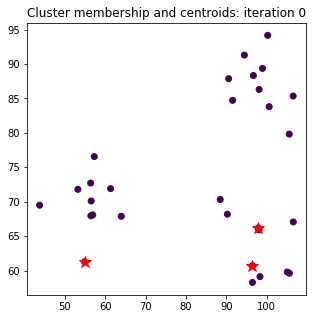

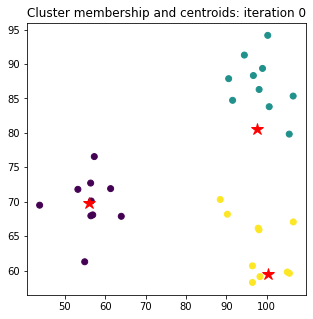

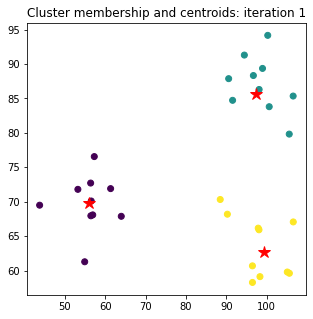

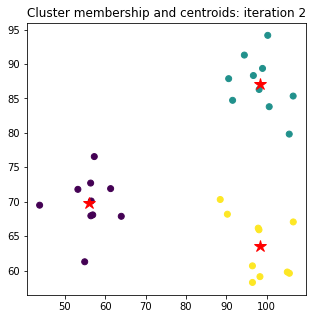

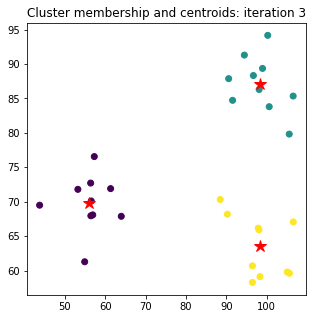

In [13]:
K = 3
#  pick randomK starting points as the initial cluster centres
idx = np.random.randint(numItems, size=K)
centres = X[idx,:]
iteration=0
clusterLabels = np.ones(numItems)
numMoved=100

PlotCluster(X,clusterLabels,centres,iteration)

runKMEANS(X,centres)

## Of course you wouldn't normally write your own version...

Highly optimised versions available in well-established frameworks e.g. Weka (Java), scikit-learn (python).

`class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001,...)`  
 - defult number of clusters
 - variety of "smart" initialisation schemes
 - n_init: number of repeats it does before returning the best
 
Object attributes include: 
- `cluster_centers` :ndarray of shape (n_clusters, n_features)
- `labels`  : ndarray of shape (n_samples,)
- `inertia` : float (Sum of squared distances of samples to their closest cluster center.)

 
Methods include: 
- `fit(X[, y, sample_weight])` : Compute k-means clustering.
or this estimator.
- `predict(X[, sample_weight])` : Predict the closest cluster each sample in X belongs to.
- `fit_predict(X[, y, sample_weight])` : Compute cluster centers and predict cluster index for each sample.
- `get_params([deep])` : Get parameters f
- `score(X[, y, sample_weight])` : Opposite of the value of X on the K-means objective.
- ...


## K-Means Strengths and weaknesses 
<img src="figures/ML/kmeans_clustering_examples.png" style="float:right">

### PROS: 
- fast, 
- lots of implementations

### CONS:
- need right value of K, 
- results depend on starting points

### Assumptions:
- all features are relevant, 
- data is "globular" with respect to the current features

### How could we fix the counter-example?

## Break

## Reinforcement Learning
Five minute video.

[![Reinforcement learning for bar-tenders](https://img.youtube.com/vi/v=m2weFARriE8/0.jpg)](https://www.youtube.com/watch?v=m2weFARriE8)
https://www.youtube.com/watch?feature=oembed&v=m2weFARriE8

## Reinforcement Learning <img src="figures/ML/RL.png" style="float:right" width=400>
Q learning was best known initial algorithm
- Basic idea is that you have a *Reward* table R
 - which tells you what reward you get if you are in state s and take action a
 - for a multi-step problem the immediate rewards might be zero for many states  
  e.g. finding your way out of a maze, playing tic-tac-toe (noughts and crosses)  
  ... 
- Uses repeated trials to learn a Quality table Q:  
  one row for each  state *s*,  one column for each action *a*
 - Start exploring, and build up a list of what  
   states you have been in: *s<sub>1</sub>*, *s<sub>2</sub>)*, ..., *s<sub>t</sub>)*  
   actions you have taken: *a<sub>1</sub>*, *a<sub>2</sub>*, ..., *a<sub>t</sub>*
 - If at time  *t* you get a reward *r*  
   then Q[*s<sub>t</sub>*][*a<sub><sub>)*]  is increased by *r*  
   and the previous steps get a 'discounted' reward too    
    e.g. Q[ *s<sub>t-1</sub>* ][ *a<sub>t-1</sub>* ] is increased by  0.9 * *r*  
    ...
- Over time the Q table learns the best sequences of moves to take,  
   so you can use it to pick the next move
    
- Problems with scalability as numbers of  
  possible states and actions increase

## Deep Reinforcement Learning  <img src="figures/ML/AlphaGoZero.png" style="float:right" width=200>
- neural net rather than table 
- tends to learn “end-to-end”  rather than a Q table and a policy table
  E.g. Alpha Go, Atari simulator
- Relies on lots of data:  
  e.g. Unity: ‘learning brain’
  From ml-agents toolkit
 Links out to tensorflow model
 
- Alpha Go Zero:   
  learned by playing itself!
  image from https://medium.com/syncedreview/alphago-zero-approaching-perfection-d8170e2b4e48
 
 Really nice explanation of Q-learning here: http://mnemstudio.org/path-finding-q-learning-tutorial.htm
 

## Supervised Learning
Basic idea: Models divide up “decision space” into regions


Search for model is driven by minimising error

Form depends on what the ouputs can be
- Two class:  0/1 loss 
- Many class: Cross entropy 
- Continuous: mean squared error

Types of models we’ll look at:
- K Nearest Neighbours
- Greedy Rule Induction
- Decision Trees
- Artificial Neural Nets

**Classification** algorithms put labels on regions

**Regression** algorithms compute a function in regions. 



## The basic supervised learning process
1. Choose features according to what kind of data you have available
2. Decide what types of model might be appropriate 
 - human readable?,   
 - type and amount of data?    
3. Initialise Model 
4.  While not finished:
  - See how well it does on training set
 - Adapt model to reduce error on training set
5.  Try to estimate how good it is

Often do steps 3-5 above in parallel with different types of model or metaparameters
E.g. max number of rules, max depth of trees, value of k in kNN, learning rates in ANN   


## How we use our data <img src="figures/ML/using_data.png" style="float:right" width=300>

### Unsupervised Learning: 
- Estimate of quality is based on whole dataset,  
  so use it all for training

### Reinforcement learning:
- Problem is usually lack of data compared to size of state-action space.  
- Because data is only generated by using the algorithm!
- Alternate periods of:
  - training (explore state-action-reward space to improve model)
  - testing (choose current max predicted reward in each state) 
  
### Supervised learning:
Most commonly work in *off-line* or  *batch* mode 
- Random split of the data into separate test set, training set, and sometimes validation set
- Final model then built using all the data available


# Summary: you need to know and understand
- When it is legal and ethical to use data
- The basic workflow of **preprocess** &rarr; **train** &rarr; **test**
- The difference between **Unsupervised**, **Reinforcement**, and **Supervised Learning**
- kMeans as a typical unsupervised clustering algorithm
  - stochastic, distance-based
- The basic idea (but not the details) of reinforcement learning 
  - immediate rewards for taking action *a* in state *s*
  - build up a Q-table predicting future reward for taking action *a* in state *s*
- Supervised learning:
  - places *decision boundaries* to divide  feature space into regions
  - *Classification*: each region has a label; *Regression*: each region calculates a number
  - adapts boundaries to minimise error on the *training set*
  